<a href="https://colab.research.google.com/github/brunotiglla/NeoPetCare.V1/blob/master/TrabajoParcial_2021_Complejidad__Algoritmica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math
import heapq as hq
import graphviz as gv
!git clone https://github.com/lmcanavals/algorithmic_complexity.git
from algorithmic_complexity.aclib import graphstuff as gs

fatal: destination path 'algorithmic_complexity' already exists and is not an empty directory.


In [58]:
base = "https://raw.githubusercontent.com/lmcanavals/algorithmic_complexity/main/data/"
csv = "poblaciones.csv"
DATA_SET = pd.read_csv(f"{base}{csv}")

### CODIGO MEJORAD BY JOSIAS

In [112]:
def nxBgv(G, weighted=False, params={'rankdir': 'LR', 'size': '6'},
          path=None, pathparams={'color':'orangered'}, nodeinfo=False):
  if G.is_directed():
    g = gv.Digraph('G')
  else:
    g = gv.Graph('G', strict=True)
  g.attr(**params)

  for u in G.nodes:
    if nodeinfo:
      g.node(str(u), **dict(G.nodes[u]))
    else:
      g.node(str(u))

 
    
  for u, v in G.edges():
    #print(v,path[v], path)
    pp = {} if path and path[v] == u else {}
    #print(path[v], u)

    if weighted:
      g.edge(str(u), str(v), f"{G.edges[u, v]['weight']}", **pp)
    else:
      g.edge(str(u), str(v), **pp)

  for u in range(1, len(path)):
    pp = pathparams
    g.edge(str(u), str(path[u]), f"{G.edges[u, path[u]]['weight']}", **pp)       

  return g

####Calcular Distancia

In [60]:
def calcularDistancia(cp1,cp2):
    la1, lo1 = float(cp1['LATITUD']), float(cp1['LONGITUD'])
    la2, lo2 = float(cp2['LATITUD']), float(cp2['LONGITUD'])
    
    lo1, la1, lo2, la2 = map(math.radians, [lo1, la1, lo2, la2])
    dlo = lo2 - lo1
    dla = la2 - la1
    a = math.sin(dla/2)**2 + math.cos(la1) * math.cos(la2) * math.sin(dlo/2)**2
    c = 2 * math.asin(math.sqrt(a))
    r = 6371

    return round(c * r, 2)

####Area de estudios de provincia a provincia

In [61]:
def Area_Estudio(DATA_SET, Nom_Provinci, Nom_Distrito):

    list_Provincia = DATA_SET['PROVINCIA'].unique() #no repetir

    Provincia = dict()

    for i, nom1 in enumerate(list_Provincia):
        Provincia[nom1] = DATA_SET[DATA_SET['PROVINCIA'] == nom1]

    #---#

    list_Distrito = Provincia[Nom_Provinci]['DISTRITO'].unique()

    Distrito = dict()

    for j, nom2 in enumerate(list_Distrito):
        Distrito[nom2] = Provincia[Nom_Provinci][Provincia[Nom_Provinci]['DISTRITO'] == nom2]
    
    CentrosPoblados = Distrito[Nom_Distrito]
    #--#
    return CentrosPoblados

####Area de estudios de Distritos a Distritos

In [62]:
def Area_Estudio_Mayor(DATA_SET, Nom_Provinci):

    list_Provincia = DATA_SET['PROVINCIA'].unique() #no repetir

    Provincia = dict()

    for i, nom1 in enumerate(list_Provincia):
        Provincia[nom1] = DATA_SET[DATA_SET['PROVINCIA'] == nom1]

    #---#
 
    CentrosPoblados = Provincia[Nom_Provinci]
    #--#
    return CentrosPoblados

###Ejemplos

In [63]:
Zona = Area_Estudio(DATA_SET,'CHICLAYO', 'OYOTUN')
Zona

,DEPARTAMENTO,PROVINCIA,DISTRITO,CENTRO POBLADO,LATITUD,LONGITUD,NMI1,NMI2
1623,LAMBAYEQUE,CHICLAYO,OYOTUN,BEBEDEROS,-6.80447,-79.297753,14,42
1624,LAMBAYEQUE,CHICLAYO,OYOTUN,CANTA GALLO,-6.860437,-79.3785,2,5
1625,LAMBAYEQUE,CHICLAYO,OYOTUN,CHUMBENIQUE,-6.865822,-79.400267,49,130
1626,LAMBAYEQUE,CHICLAYO,OYOTUN,EL SEIS,-6.809653,-79.21591,14,31
1627,LAMBAYEQUE,CHICLAYO,OYOTUN,ESPINAL,-6.819611,-79.202495,85,243
1628,LAMBAYEQUE,CHICLAYO,OYOTUN,LA COMPUERTA,-6.849306,-79.352616,122,307
1629,LAMBAYEQUE,CHICLAYO,OYOTUN,MACUACO,-6.802402,-79.23779,42,132
1630,LAMBAYEQUE,CHICLAYO,OYOTUN,MOTETE,-6.876848,-79.421388,4,11
1631,LAMBAYEQUE,CHICLAYO,OYOTUN,OYOTUN,-6.85434,-79.306302,1696,5735


In [83]:
Zona2 = Area_Estudio_Mayor(DATA_SET,'UTCUBAMBA')
Zona2

,DEPARTAMENTO,PROVINCIA,DISTRITO,CENTRO POBLADO,LATITUD,LONGITUD,NMI1,NMI2
13,AMAZONAS,UTCUBAMBA,CAJARURO,NARANJITOS,-5.814901,-78.277449,177,577
14,AMAZONAS,UTCUBAMBA,CUMBA,AGUA AZUL,-5.969275,-78.619398,1,1
15,AMAZONAS,UTCUBAMBA,CUMBA,CHALA,-5.973545,-78.633153,1,6
16,AMAZONAS,UTCUBAMBA,CUMBA,PUERTO CHOROS,-5.894283,-78.687223,1,4
17,AMAZONAS,UTCUBAMBA,CUMBA,TAGTAGO,-5.981024,-78.630186,202,562
18,AMAZONAS,UTCUBAMBA,EL MILAGRO,PAPAYA BAJA (PARCIALIDAD),-5.560332,-78.570703,15,33
19,AMAZONAS,UTCUBAMBA,JAMALCA,PUERTO NARANJITOS,-5.82154,-78.275662,102,360
20,AMAZONAS,UTCUBAMBA,LONYA GRANDE,ARCURCO,-6.101007,-78.417463,0,0
21,AMAZONAS,UTCUBAMBA,LONYA GRANDE,BOLIVIA,-6.101328,-78.427833,1,3
22,AMAZONAS,UTCUBAMBA,LONYA GRANDE,LONYA GRANDE,-6.096373,-78.422516,698,2896


In [65]:
ZonaV3 = Area_Estudio(DATA_SET,'UTCUBAMBA', 'LONYA GRANDE')
ZonaV3

,DEPARTAMENTO,PROVINCIA,DISTRITO,CENTRO POBLADO,LATITUD,LONGITUD,NMI1,NMI2
20,AMAZONAS,UTCUBAMBA,LONYA GRANDE,ARCURCO,-6.101007,-78.417463,0,0
21,AMAZONAS,UTCUBAMBA,LONYA GRANDE,BOLIVIA,-6.101328,-78.427833,1,3
22,AMAZONAS,UTCUBAMBA,LONYA GRANDE,LONYA GRANDE,-6.096373,-78.422516,698,2896
23,AMAZONAS,UTCUBAMBA,LONYA GRANDE,MANCARRON,-6.096585,-78.428543,2,4
24,AMAZONAS,UTCUBAMBA,LONYA GRANDE,MATULI,-6.106335,-78.416907,1,1


####Generacion del Grafo

In [66]:
def Gra(cp1, cp2, x):
  G = nx.Graph()
  indice = cp1.index[0] 
  for i, cp1 in x.iterrows():
    G.add_node(i-indice)

  for i, cp1 in x.iterrows():
    for j, cp2 in x.iterrows():
        if cp1['CENTRO POBLADO'] != cp2['CENTRO POBLADO']:     
            G.add_edge(i - indice, j - indice, weight =round(calcularDistancia(cp1, cp2), 2))
  
  return G

### CREACION DEL GRAFO

In [104]:
G = Gra(ZonaV3, ZonaV3, ZonaV3)

In [105]:
G_2 = Gra(Zona2, Zona2, Zona2)

#####Formula para el camino mas pequeño

In [70]:
def min_path(G, c):
  arr = []
  for h in G.neighbors(c):
    arr.append(G.edges[c, h]['weight'])
  arr.sort()
  return min(arr)  

### CODIGO DE FUERZA BRUTA MODIFICADA....

In [96]:
def FuerzaBrutaModif(G, s): 
  for u in G:
    G.nodes[u]['visited'] = False             
    G.nodes[u]['path']    = -1                

  queue = [s]
  L = nx.Graph(G)
  G.nodes[s]['visited'] = True 
  #print(G.nodes.data())
  while len(queue) > 0 :
    
    q = queue[0]
    for i in G.neighbors(q):
      if not G.nodes[i]['visited'] and L.edges[q, i]['weight'] == min_path(L, q):
          G.nodes[i]['visited']  = True
          G.nodes[i]['path'] = q
          queue.append(i) 
          #print("TIENE QUE ENTRAR", i, queue)
    L.remove_node(queue[0])
    del queue[0]
    #print(queue)
    #print('\n cambio de queue', queue)

  path = []
  for n in range(len(G.nodes)):
    path.append(G.nodes[n]['path'])


  return path

#### GENERADON DE CAMINOS

In [115]:
path = FuerzaBrutaModif(G, 0)
path_2 = FuerzaBrutaModif(G_2, 0)

#### REAL MAPA

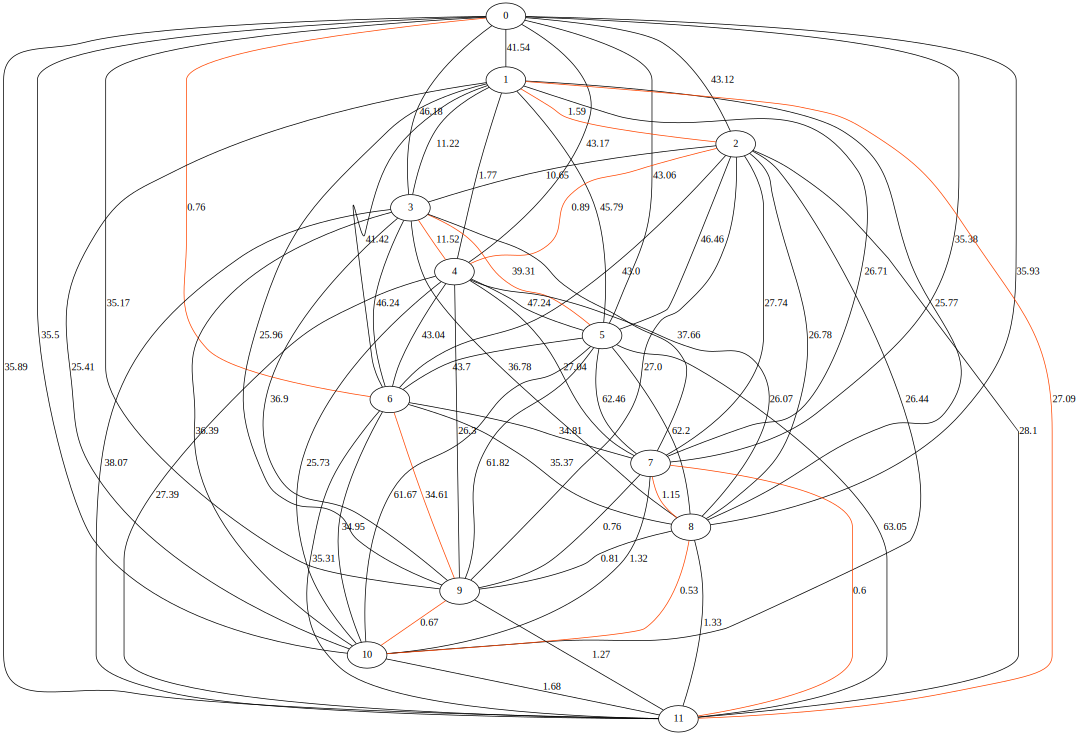

In [116]:
nxBgv(G_2, path = path_2 ,weighted=True, params={'size': '15'})

#GRAFICANDO

In [117]:
v = []
nx_path = path[:]
indice = [0]

# PAREMETROS PARA GRAFICAR
for i in range(1, len(path)):
  v.append((i, path[i]))
  indice.append(i)

######DATOS PARA GRAFICAR

In [119]:
v = []
nx_path = path_2[:]
indice = [0]

# PAREMETROS PARA GRAFICAR
for i in range(1, len(path)):
  v.append((i, path[i]))
  indice.append(i)

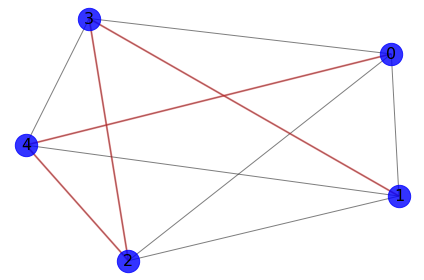

[-1, 3, 4, 2, 0]


In [120]:
pos = nx.spring_layout(G, seed=3113794652)
options = {"node_size": 500, "alpha": 0.8}
nx.draw_networkx_nodes(G, pos, nodelist=indice, node_color="b", **options)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=v,
    width=2,
    alpha=0.5,
    edge_color="tab:red",
)
nx.draw_networkx_labels(G, pos, font_size=16)

plt.tight_layout()
plt.axis("off")
plt.show()
print(path)